# **✨ Create Clustering Model Using K-Means✨** #

## **📍 Table of Content 📍**
- Business Understanding

- Data Preparation
    - Import Libraries
    - Import Datasets
    
- Data Understanding/Exploring Datasets
    - Data Shape
    - Data Info
    - Checking Missing Value
    - Checking Duplicate Rows
    
- Data Preprocessing
    - Rename Column
    - Change Data Type
    - Data Imputation
    - Check Data Outlier
    - Data Transformation with Standardization

- Clustering Model with K-Means Model
    - Elbow Method
    - K-Means Model Segmentation
    - K-Means Model Segmentation using PCA
    - Silhoutte Score
    - RFM Analysis
    
## **Datasets** ##
- [Customer](https://drive.google.com/file/d/1iC_2MvbHQsLq_uqSjejZnPExKcrKXsCa/view?usp=sharing)
- [Product](https://drive.google.com/file/d/1YHY_VunBnw2N9tYFsrGZwbTdLAsU_cAf/view?usp=sharing)
- [Store](https://drive.google.com/file/d/16N4dJOPb4ph3Jrx0dqrp3r2CJlSpTbnC/view?usp=sharing)
- [Transaction](https://drive.google.com/file/d/1CHLPSxzMBNtft64xf3R-FyU3W3rw3QTB/view?usp=sharing)

## **💡 Business Understanding** ##

The inventory team needs help from the Data Team to be able to help predict the sales volume (quantity) of the total number of Kalbe products.

The aim of this project is to find out estimate the quantity of product sold so that the team inventory can make stock daily inventory sufficient.

Predictions must be made daily.

## **💡 Data Preparation** ##

### **📌 Import Libraries** ###

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings 
warnings.filterwarnings("ignore")

### **📌 Import Dataset** ###

In [2]:
#Read all csv files
customers = pd.read_csv('database/Case Study - Customer.csv',sep=';')
product = pd.read_csv('database/Case Study - Product.csv',sep=';')
transaction = pd.read_csv('database/Case Study - Transaction.csv',sep=';')
store = pd.read_csv('database/Case Study - Store.csv',sep=';')

In [3]:
customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [6]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [7]:
# Merge all table into one

df = pd.merge(transaction, product,on='ProductID', suffixes = ('_customers', '_product'))
df = pd.merge(df, store, on='StoreID')
df = pd.merge(df, customers, on='CustomerID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_customers,Qty,TotalAmount,StoreID,Product Name,Price_product,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


## **💡 Data Understanding/Exploring Dataset** ##

### **📌 Data Shape** ##

In [8]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (5020, 19)
Number of rows : 5020
Number of columns : 19


### **📌 Data Info** ###

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    5020 non-null   object
 1   CustomerID       5020 non-null   int64 
 2   Date             5020 non-null   object
 3   ProductID        5020 non-null   object
 4   Price_customers  5020 non-null   int64 
 5   Qty              5020 non-null   int64 
 6   TotalAmount      5020 non-null   int64 
 7   StoreID          5020 non-null   int64 
 8   Product Name     5020 non-null   object
 9   Price_product    5020 non-null   int64 
 10  StoreName        5020 non-null   object
 11  GroupStore       5020 non-null   object
 12  Type             5020 non-null   object
 13  Latitude         5020 non-null   object
 14  Longitude        5020 non-null   object
 15  Age              5020 non-null   int64 
 16  Gender           5020 non-null   int64 
 17  Marital Status   4976 non-null   

### **📌 Checking Missing Value** ###

In [10]:
df.isna().sum()

TransactionID       0
CustomerID          0
Date                0
ProductID           0
Price_customers     0
Qty                 0
TotalAmount         0
StoreID             0
Product Name        0
Price_product       0
StoreName           0
GroupStore          0
Type                0
Latitude            0
Longitude           0
Age                 0
Gender              0
Marital Status     44
Income              0
dtype: int64

### **📌 Checking Duplicate Row** ###

In [11]:
df.duplicated().sum()

0

## **💡 Data Preprocessing** ##

### **📌 Rename Column** ###

In [12]:
for column in df.columns:
    df.rename(columns ={column: column.lower()}, inplace = True)
df.rename(columns = {'marital status': 'marital_status'}, inplace = True)
df.rename(columns = {'product name': 'product_name'}, inplace = True)
df.head()

,transactionid,customerid,date,productid,price_customers,qty,totalamount,storeid,product_name,price_product,storename,groupstore,type,latitude,longitude,age,gender,marital_status,income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


### **📌 Change Data Type** ###

In [13]:
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y', infer_datetime_format=True)
df['income'] = df['income'].map(lambda x: float(x.replace(',','.')))
df.head()

,transactionid,customerid,date,productid,price_customers,qty,totalamount,storeid,product_name,price_product,storename,groupstore,type,latitude,longitude,age,gender,marital_status,income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,10.53
1,TR56601,328,2022-12-24,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,10.53
2,TR89012,328,2022-03-25,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,10.53
3,TR67395,328,2022-01-22,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,10.53
4,TR45738,328,2022-12-29,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,10.53


### **📌 Data Imputation** ###

After check Missing Value, there is 44 rows are Null in `marital_status`, we need do Data Imputation to fill Null Values

In [14]:
# fill null values with mode method
mode_marital_status = df['marital_status'].mode()[0]
df['marital_status'].fillna(mode_marital_status, inplace = True)
df.isna().sum()

transactionid      0
customerid         0
date               0
productid          0
price_customers    0
qty                0
totalamount        0
storeid            0
product_name       0
price_product      0
storename          0
groupstore         0
type               0
latitude           0
longitude          0
age                0
gender             0
marital_status     0
income             0
dtype: int64

### **📌 New DataFrame for K-Means Modeling** ###

In [15]:
df_clustering = df.groupby('customerid').agg({'transactionid' : 'count',
                                          'qty' : 'sum',
                                          'totalamount' : 'sum'})
df_clustering.head()

,transactionid,qty,totalamount
customerid,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


In [16]:
print("Shape of data :", df_clustering.shape)
print("Number of rows :", df_clustering.shape[0])
print("Number of columns :", df_clustering.shape[1])

Shape of data : (447, 3)
Number of rows : 447
Number of columns : 3


### **📌 Check Data Outlier** ###

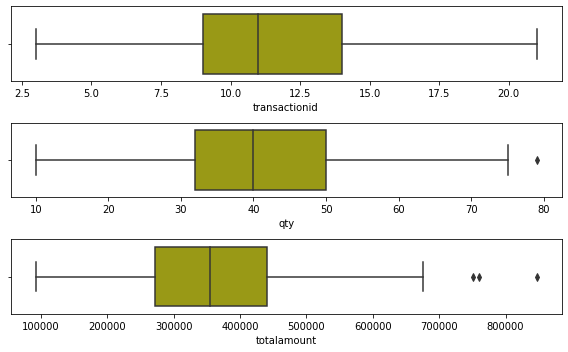

In [17]:
cols = ['transactionid', 'qty', 'totalamount']

plt.figure(figsize=(8, 5))
n = 3
for i in range(0, len(cols)):
    plt.subplot(n, math.ceil(len(cols)/n), i+1)
    sns.boxplot(x=df_clustering[cols[i]], color='#afaf00')
    plt.tight_layout()

**Observation:**

There is data outlier in `qty` and `totalamount`, but not too many and significant, therefore it does not need further processing

### **📌 Data Transformation** ###

In [18]:
# Standardize the Data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data in cluster_df
df_clustering_std = scaler.fit_transform(df_clustering.values)

# Convert the standardized data back to a DataFrame
df_clustering_std = pd.DataFrame(df_clustering_std, columns=df_clustering.columns)

# check the cluster_df_std data
df_clustering_std.head()

,transactionid,qty,totalamount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347


## **💡 Clustering Model with K-Means Model** ##

### **📌 Elbow Method** ###

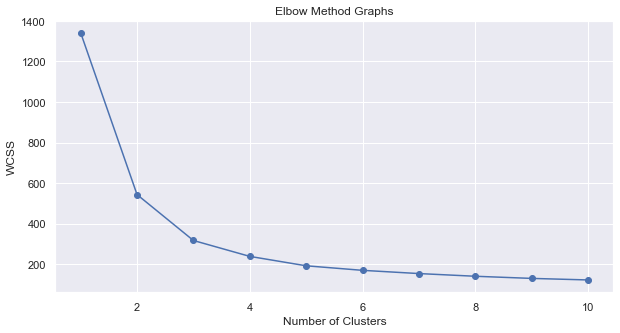

In [19]:
# plot the elbow method to get best number of clusters
wcss = [] # wcss is Within Cluster of Sum Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(df_clustering_std.values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method Graphs')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Observation:**

The result of Elbow Method above shows that `the best suit number of cluster is 3 clusters`

### **📌 K-Means Model Segmentation** ###

In [21]:
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, n_init = 10)
clusters = kmeans_3.fit_predict(df_clustering_std)
df_clustering['cluster'] = clusters

df_clustering.head()

,transactionid,qty,totalamount,cluster
customerid,,,,
1,17,60,623300,0
2,13,57,392300,0
3,15,56,446200,0
4,10,46,302500,1
5,7,27,268600,2


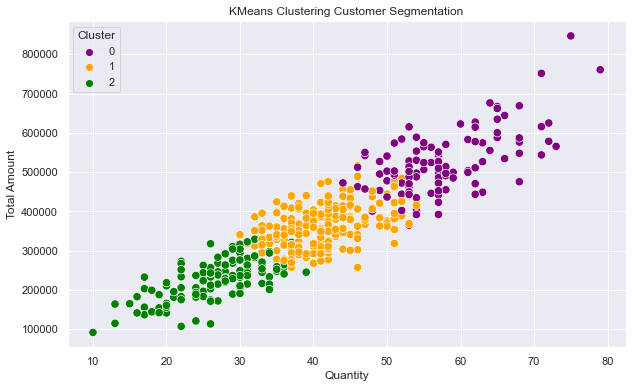

In [22]:
df_clustering['cluster'] = df_clustering['cluster'].astype('category')
colors=['purple', 'orange', 'green']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='totalamount', data=df_clustering, hue='cluster', palette=colors, s=70)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

### **📌 K-Means Model Segmentation using PCA** ###

In [23]:
# Kmeans n_cluster = 3
#Clustering Kmeans
kmeans_pca = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans_pca.fit(df_clustering_std)

df_nclus3 = pd.DataFrame(data=df_clustering_std, columns=df_clustering.columns)
df_nclus3['cluster'] = kmeans_pca.labels_
df_nclus3.head()

,transactionid,qty,totalamount,cluster
0,1.779816,1.496527,2.094768,0
1,0.545884,1.261093,0.239269,0
2,1.162850,1.182615,0.672218,0
3,-0.379565,0.397833,-0.482047,1
4,-1.305014,-1.093251,-0.754347,2


In [24]:
#PCA
clust_pca = PCA(n_components=2).fit_transform(df_clustering_std)
df_clust_pca = pd.DataFrame(data=clust_pca,columns=['pc1','pc2'])
df_clust_pca['cluster'] = df_nclus3['cluster']
df_clust_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
pc1,447.0,-5.141301e-17,1.661646,-4.120551,-1.132975,-0.123870,1.081022,5.351262
pc2,447.0,-3.576557e-17,0.386276,-1.279946,-0.242372,-0.003848,0.246496,1.348982
cluster,447.0,1.055928e+00,0.739048,0.000000,1.000000,1.000000,2.000000,2.000000


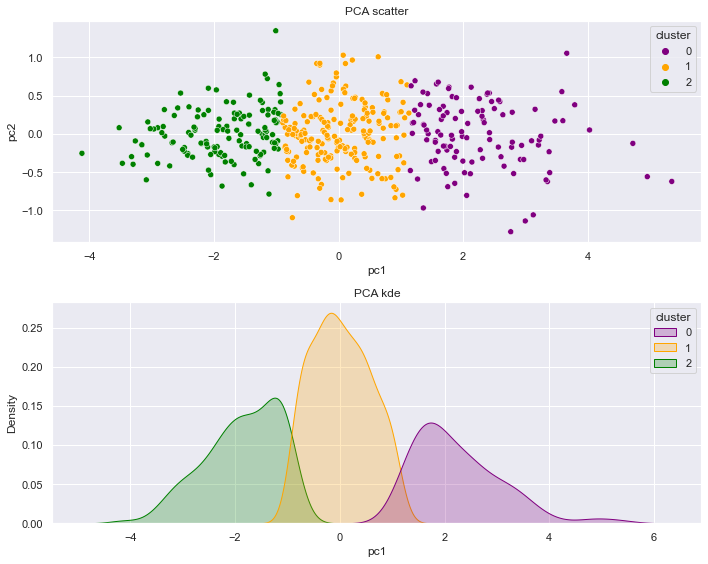

In [27]:
#PCA plot
colors=['purple', 'orange', 'green']
fig,ax = plt.subplots(2,1,figsize=(10,8))
sns.scatterplot(data=df_clust_pca,x='pc1',y='pc2',hue='cluster',palette=colors,ax=ax[0])
ax[0].set_title('PCA scatter')
sns.kdeplot(data=df_clust_pca,x='pc1',hue='cluster',palette=colors,fill=True,ax=ax[1])
ax[1].set_title('PCA kde')
plt.tight_layout()
plt.show()

### **📌 Silhoutte Score** ###

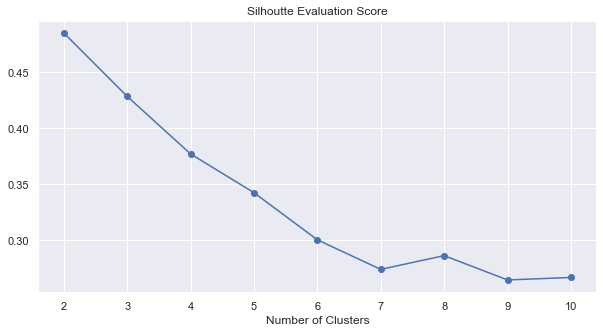

In [28]:
from sklearn.metrics import silhouette_score

n_clust = list(range(2,11))
silhouette_avg = []
for i in n_clust:
    kmeans = KMeans(n_clusters=i).fit(df_clustering_std)
    preds = kmeans.predict(df_clustering_std)
    score_euclidean = silhouette_score(df_clustering_std, preds, metric='euclidean')
    silhouette_avg.append(score_euclidean)

plt.figure(figsize=(10, 5))
sns.set()
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('Silhoutte Evaluation Score')
plt.xlabel('Number of Clusters')
plt.show()

### **📌 RFM Analysis** ###

In [33]:
df_clustering['cluster'] = kmeans_3.labels_

df['recency'] = (pd.to_datetime('2023-01-01') - df['date']).dt.days.astype('int')
df_recency = df.groupby('customerid').agg({'recency':'min'})

df_rfm = df_clustering.copy()
df_rfm['recency'] = df_recency['recency']

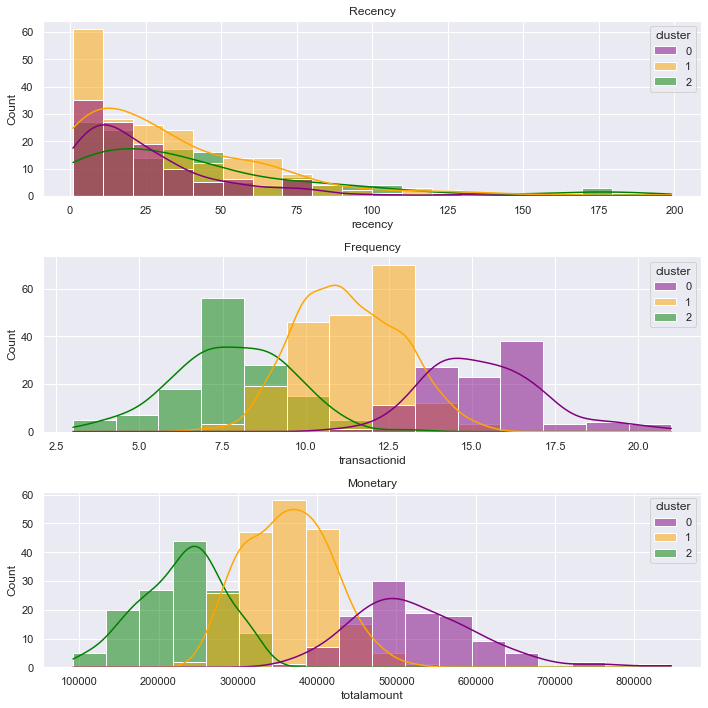

In [35]:
colors=['purple', 'orange', 'green']
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.histplot(data=df_rfm,x='recency',hue='cluster',palette=colors,ax=ax[0],kde=True)
ax[0].set_title('Recency')
sns.histplot(data=df_rfm,x='transactionid',hue='cluster',palette=colors,ax=ax[1],kde=True)
ax[1].set_title('Frequency')
sns.histplot(data=df_rfm,x='totalamount',hue='cluster',palette=colors,ax=ax[2],kde=True)
ax[2].set_title('Monetary')

plt.tight_layout()
plt.show()

In [44]:
display(df_rfm.groupby('cluster').agg(['mean','median', 'max', 'min']))

transactionid                       qty                   totalamount  \
                 mean median max min       mean median max min           mean   
cluster                                                                         
0           15.363636   15.0  21  11  57.636364   57.0  79  44  524504.545455   
1           11.282178   11.0  15   7  41.188119   41.0  54  30  363267.326733   
2            7.785185    8.0  13   3  26.933333   28.0  39  10  229388.888889   

                                     recency                  
           median     max     min       mean median  max min  
cluster                                                       
0        510550.0  846700  365000  24.336364   16.0  129   2  
1        362400.0  516600  257600  33.712871   25.0  199   1  
2        235300.0  329300   92100  42.977778   31.0  191   1

**Observation:**

Based on the results of the RFM analysis above, customer characteristics based on each cluster:

- **Clusters 0:**
    - Customers in this cluster have `the lowest recency with an average of around 24 days`. Based on this, it can be concluded that customers in cluster 0 tend to shop more often because customers are able to shop again in less than 1 month.
    - The frequency of purchases made by customers in this cluster tends to be more frequent and can be said to be `the most frequent of all clusters`. This can be seen from the number of transactions made by customers with an `average of 15 times`
    - `Total Amount spent on shopping in this cluster is among the highest` with an average `total amount of around $524,500`.

Based on this information, customers in Cluster 0 can be summed up as **Priority Customers (Tier 1)**

**Business Recommendation for Cluster 0 (Priority Customers)**

    Customers in this cluster have the lowest recency, very active for shopping and spending very much money. So we can give recommendation:
    - Give Voucher/Rewards
    - Give Promo Bundling/Special Offer Mix & Match bundling strategy  
    

- **Cluster 1:**
    - Customers in Cluster 1 have an `average recency/last shopping time of around 33 days`. Based on this, it can be said that customers in this cluster have a `slightly longer recency` and will return to shopping again after more than 1 month.
    - The frequency of purchases made by customers in this cluster can be said to be `quite frequent`, as can be seen from the `total transactions with an average shopping frequency of 11 times`.
    - Total Amount spent on shopping in this cluster can be said to be `quite a lot` with an `average total amount of around $363,000`.
    
Based on this information, customers in Cluster 1 can be summed up as **Potential Customers (Tier 2)**

**Business Recommendation for Cluster 1 (Potential Customers)**

    Customers in this cluster have slightly longer recency, quite active for shopping and spending quite much money. So we can give recommendation:
        - Give Discount/Flash Sale
        - Promo Bundling/Special Offer Buy 1 Get 1 strategy
        

- **Cluster 2:**
    - Customers in Cluster 2 have an `average recency/last shopping time of around 43 days`. Based on this, it can be said that customers in this cluster have `the longest recency` and will return to shopping again after more than 1.5 months.
    - The frequency of purchases made by customers in this cluster can be said to be `the least frequent` as seen from the `total transactions with an average shopping frequency of 8 times`.
    - Total Amount spent on shopping in this cluster can be said to be `the least spent` with an `average total amount of around $229,300`.
    
Based on this information, customers in Cluster 1 can be summed up as **Need Attention Customers (Tier 3)**

**Business Recommendation for Cluster 2 (Need Attention Customers)**

    Customers in this cluster have the longest recency, quite active for shopping and spending quite much money. So we can give recommendation:
        - Give Discount/Flash Sale
        - Promo Bundling/Special Offer Buy 1 Get 1 and Limited Edition Bundling (giving urgency sense to purchase)

## **💡 Business Insight** ##

### **📌 Statistics Info of `transactionid` `qty` `totalamount`** ###

In [36]:
display(df_clustering.groupby('cluster').agg(['mean','median', 'max', 'min']))

transactionid                       qty                   totalamount  \
                 mean median max min       mean median max min           mean   
cluster                                                                         
0           15.363636   15.0  21  11  57.636364   57.0  79  44  524504.545455   
1           11.282178   11.0  15   7  41.188119   41.0  54  30  363267.326733   
2            7.785185    8.0  13   3  26.933333   28.0  39  10  229388.888889   

                                   
           median     max     min  
cluster                            
0        510550.0  846700  365000  
1        362400.0  516600  257600  
2        235300.0  329300   92100

### **📌 Total Customer in Each Cluster** ###

In [37]:
df_total_customer = df_clustering.groupby('cluster').agg({'qty':'count'}).reset_index()
df_total_customer = df_total_customer.rename(columns={'qty':'total_customers'})
df_total_customer['sum_customers'] = df_total_customer['total_customers'].sum()
df_total_customer['percentage'] = round((df_total_customer['total_customers']/df_total_customer['sum_customers'])*100, 2)
df_total_customer

,cluster,total_customers,sum_customers,percentage
0,0,110,447,24.61
1,1,202,447,45.19
2,2,135,447,30.20


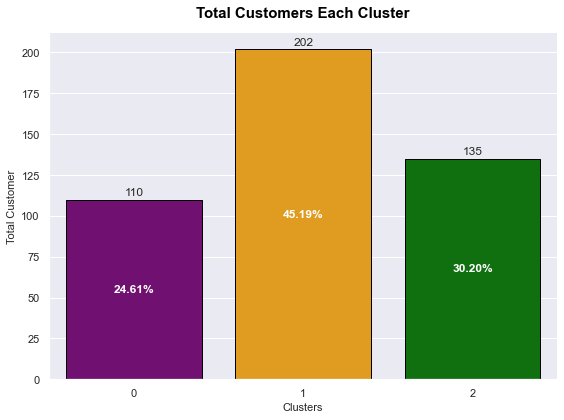

In [38]:
colors = ['purple', 'orange', 'green']
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Total Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='cluster', y='total_customers', data=df_total_customer, edgecolor='black', palette=colors)

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['24.61%', '45.19%', '30.20%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

**Observation:**

Based on barplot above, it shows that **Cluster 1** has the highest Total Customer with percentage of **45.19%**, then followed by **Cluster 2** has Total Customer with percentage of **30.20%** and **Cluster 0** has Total Customer with percentage of **24.61%**.

### **📌 Customer Segmentation based on `transactionid` `qty` `totalamount`** ###

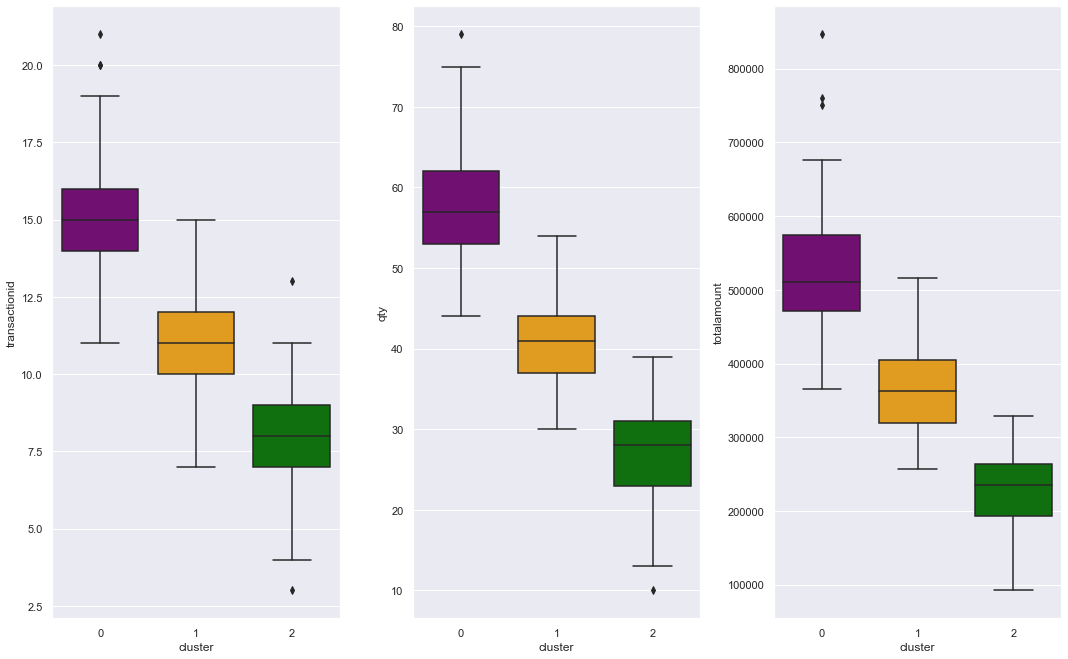

In [39]:
df_clust = df_clustering.copy()
clust = df_clust.columns.drop('cluster')

colors = ['purple', 'orange', 'green']
plt.figure(figsize= (15, 18))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_clustering['cluster'], y=df_clustering[clust[i]], palette=colors)
    plt.tight_layout()

**Observation:**

Based on the Boxplot above, the information that can be concluded is:
- 

### **📌 Age VS Customer Segmentation** ###

Text(0.5, 1.0, 'Age VS Customer Segmentation')

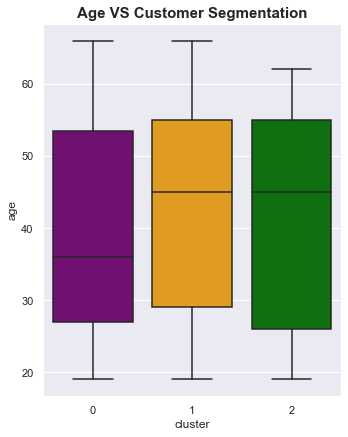

In [40]:
colors = ['purple', 'orange', 'green']
plt.figure(figsize= (5, 6))
sns.boxplot(x=df_clustering['cluster'], y=df['age'], palette=colors)
plt.tight_layout()

plt.title("Age VS Customer Segmentation", fontsize=15, fontweight="bold")

### **📌 Income VS Customer Segmentation** ###

Text(0.5, 1.0, 'Income VS Customer Segmentation')

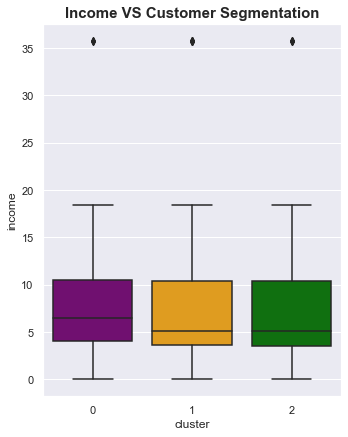

In [41]:
colors = ['purple', 'orange', 'green']
plt.figure(figsize= (5, 6))
sns.boxplot(x=df_clustering['cluster'], y=df['income'], palette=colors)
plt.tight_layout()

plt.title("Income VS Customer Segmentation", fontsize=15, fontweight="bold")